# Cost Minimized Healthy Diet Plan - Men

**Problem formulation:** Due to the economic situation in Sri Lanka, obtaining a nutritious diet plan for Sri Lankans is a significant challenge. This method generates the best balanced diet plan for a person using Sri Lankan foods while keeping the total cost of the diet plan to a minimum.

**Objective**: Minimize cost of the diet while selecting nutritious diet plan

**Form:** Minimization

**Decision Variables:** Sri Lankan food items to select

**Constrains:** Calorie range in selected food items
                ,fat range in selected food items
                ,Sugar in selected food items
                ,protein in selected food items
                ,sodium in selected food items
                ,carbohydrate in selected food items
                ,calcium in selected food items
                ,iron in selected food items
                ,selecting one item from main 15 food categories which are in align with Codex Alimentarius included in the Sri Lankan Nutrient Profile model (One food item must select from each food category).




In [1]:
import pandas as pd
data = pd.read_csv('/content/Sri-Lankan-data-set-csv.csv', nrows=68)

In [2]:
data

,Food Category,Foods,Serving Price (LKR),Serving quantity (g),Calories(kcal/serving quantity),Total Fat (g),Total Sugar (g),Total Protein (g),Total Sodium (mg),Total Carbohydrate (g),Total Calcium (mg),Total Iron (mg),Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1,Samba Rice,19.80,90.0,308.0,0.9,0.0,6.4,6.8,68.0,0.00,6.000,NaN,NaN,NaN,NaN
1,1,Nadu(local) Rice,20.28,98.0,109.0,0.8,0.0,2.3,1.0,23.0,64.00,2.320,NaN,NaN,NaN,NaN
2,1,Kekulu(local) Rice,19.70,100.0,111.0,0.9,0.0,3.0,5.0,23.0,100.00,4.000,NaN,NaN,NaN,NaN
3,1,Nadu(Imported) Rice,17.15,98.0,109.0,0.8,0.0,2.3,1.0,23.0,64.00,2.320,NaN,NaN,NaN,NaN
4,1,Kekulu(Imported) Rice,16.70,100.0,111.0,0.9,0.0,3.0,5.0,23.0,100.00,4.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,15,Pizza,770.00,107.0,285.0,10.0,3.8,12.0,640.0,36.0,355.55,0.355,NaN,NaN,NaN,NaN
64,15,Fried rice,500.00,137.0,238.0,4.1,0.8,5.5,530.0,45.0,204.77,0.517,NaN,NaN,NaN,NaN
65,15,Kottu roti,500.00,221.5,359.5,13.5,5.5,18.0,422.0,43.0,119.27,0.504,NaN,NaN,NaN,NaN
66,15,Noodles,297.00,124.0,196.0,1.2,0.7,7.2,1.2,38.0,52.50,0.250,NaN,NaN,NaN,NaN


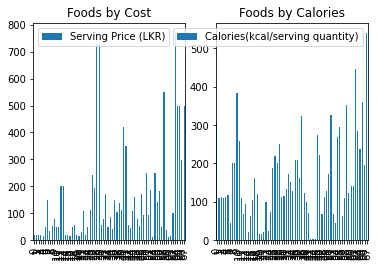

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
plot = data[[' Foods ', 'Serving Price (LKR)']].plot(kind='bar', title="Foods by Cost", ax=axs[0])
plot = data[[' Foods ', 'Calories(kcal/serving quantity)']].plot(kind='bar', title="Foods by Calories", ax=axs[1])

In [4]:
!pip install PuLP
from pulp import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Model form
prob = LpProblem("Diet_Plan_with_a_minimized_cost", LpMinimize)

In [6]:
foodItems = list(data[' Foods '])

In [7]:
prices = dict(zip(foodItems,data['Serving Price (LKR)']))

In [8]:
calories = dict(zip(foodItems,data['Calories(kcal/serving quantity)']))

In [9]:
fat = dict(zip(foodItems,data['Total Fat (g)']))

In [10]:
sugar = dict(zip(foodItems,data['Total Sugar (g)']))

In [11]:
protein = dict(zip(foodItems,data['Total Protein (g)']))

In [12]:
sodium = dict(zip(foodItems,data['Total Sodium (mg)']))

In [13]:
carbohydrate = dict(zip(foodItems,data['Total Carbohydrate (g)']))

In [14]:
calcium = dict(zip(foodItems,data['Total Calcium  (mg)']))

In [15]:
iron = dict(zip(foodItems,data['Total Iron (mg)']))

In [16]:
#Decision variables
foodDict = LpVariable.dicts('Selected-',foodItems, 0,1, cat='Integer')

In [17]:
foodDict

{' Samba Rice ': Selected___Samba_Rice_,
 ' Nadu(local) Rice ': Selected___Nadu(local)_Rice_,
 ' Kekulu(local) Rice  ': Selected___Kekulu(local)_Rice__,
 ' Nadu(Imported) Rice ': Selected___Nadu(Imported)_Rice_,
 ' Kekulu(Imported) Rice ': Selected___Kekulu(Imported)_Rice_,
 ' Dhal ': Selected___Dhal_,
 ' Oatmeal ': Selected___Oatmeal_,
 ' Samaposha ': Selected___Samaposha_,
 ' Suposha ': Selected___Suposha_,
 ' Toasted Bread ': Selected___Toasted_Bread_,
 ' Paratha roti ': Selected___Paratha_roti_,
 ' Thosei ': Selected___Thosei_,
 ' Orange ': Selected___Orange_,
 ' Apple ': Selected___Apple_,
 ' Pineapple chunk ': Selected___Pineapple_chunk_,
 ' Papaya ': Selected___Papaya_,
 ' Banana ': Selected___Banana_,
 ' Potato ': Selected___Potato_,
 ' Beans ': Selected___Beans_,
 ' Carrot ': Selected___Carrot_,
 ' Cabbage ': Selected___Cabbage_,
 ' Tomato ': Selected___Tomato_,
 ' Brinjal ': Selected___Brinjal_,
 ' Pumpkin ': Selected___Pumpkin_,
 ' Egg ': Selected___Egg_,
 ' Chicken slice ':

In [18]:
#  The objective function 
prob += lpSum([prices[f] * foodDict[f] for f in foodItems]), "Total Cost of the balanced diet"

In [19]:
#Constraints 

# Calories
prob += lpSum([calories[f] * foodDict[f] for f in foodItems]) <= 2600.0, "CalorieMaximum"
prob += lpSum([calories[f] * foodDict[f] for f in foodItems]) >= 2200.0, "CalorieMinimum"

# Fat
prob += lpSum([fat[f] * foodDict[f] for f in foodItems]) <= 90.0, "FatMaximum" 
prob += lpSum([fat[f] * foodDict[f] for f in foodItems]) >= 70.0, "FatMinimum"

# Sugar
prob += lpSum([sugar[f] * foodDict[f] for f in foodItems]) <= 65.0, "SugarMaximum" 
prob += lpSum([sugar[f] * foodDict[f] for f in foodItems]) >= 50.0, "SugarMinimum"

# Protein
prob += lpSum([protein[f] * foodDict[f] for f in foodItems]) <= 108.5, "ProteinMaximum"
prob += lpSum([protein[f] * foodDict[f] for f in foodItems]) >= 84.5, "ProteinMinimum"

# Sodium
prob += lpSum([sodium[f] * foodDict[f] for f in foodItems]) <= 1740.0, "SodiumMaximum"
prob += lpSum([sodium[f] * foodDict[f] for f in foodItems]) >= 1340.0, "SodiumMinimum"

# carbohydrate
prob += lpSum([carbohydrate[f] * foodDict[f] for f in foodItems]) <= 390.0, "CarbohydrateMaximum"
prob += lpSum([carbohydrate[f] * foodDict[f] for f in foodItems]) >= 300.0, "CarbohydrateMinimum"

# Calcium
prob += lpSum([calcium[f] * foodDict[f] for f in foodItems]) <= 1300.0, "CalciumMaximum"
prob += lpSum([calcium[f] * foodDict[f] for f in foodItems]) >= 1000.0, "CalciumMinimum"

# Iron
prob += lpSum([iron[f] * foodDict[f] for f in foodItems]) <= 37.5, "IronMaximum" 
prob += lpSum([iron[f] * foodDict[f] for f in foodItems]) >= 28.5, "IronMinimum" 

In [20]:
#Main 15 food categories which are in align with Codex Alimentarius included in the Sri Lankan Nutrient Profile model
category1 = foodItems[0:9]
category2 = foodItems[9:12]
category3 = foodItems[12:17]
category4 = foodItems[17:24]
category5 = [foodItems[24]]
category6 = foodItems[25:29]
category7 = foodItems[29:36]
category8 = foodItems[36:39]
category9 = foodItems[40:45]
category10 = foodItems[45:50]
category11 = foodItems[50:53]
category12 = foodItems[53:56]
category13 = foodItems[56:59]
category14 = foodItems[59:63]
category15 = foodItems[63:68]


prob += lpSum([foodDict[p] for p in category1]) == 1
prob += lpSum([foodDict[p] for p in category2]) == 1
prob += lpSum([foodDict[p] for p in category3]) == 1
prob += lpSum([foodDict[p] for p in category4]) == 1
prob += lpSum([foodDict[p] for p in category5]) == 1
prob += lpSum([foodDict[p] for p in category6]) == 1
prob += lpSum([foodDict[p] for p in category7]) == 1
prob += lpSum([foodDict[p] for p in category8]) == 1
prob += lpSum([foodDict[p] for p in category9]) == 1
prob += lpSum([foodDict[p] for p in category10]) == 1
prob += lpSum([foodDict[p] for p in category11]) == 1
prob += lpSum([foodDict[p] for p in category12]) == 1
prob += lpSum([foodDict[p] for p in category13]) == 1
prob += lpSum([foodDict[p] for p in category14]) == 1
prob += lpSum([foodDict[p] for p in category15]) == 1

#End of constraints 

In [21]:
prob.writeLP("SimpleDietProblem.lp")

[Selected___Apple_,
 Selected___Bacon_slice_,
 Selected___Balaya__slice_,
 Selected___Banana_,
 Selected___Beans_,
 Selected___Beef_slice_,
 Selected___Biscuit_,
 Selected___Brinjal_,
 Selected___Burgers_,
 Selected___Butter_,
 Selected___Cabbage_,
 Selected___Cake_piece_,
 Selected___Carrot_,
 Selected___Cashew_nuts_,
 Selected___Cheese_slice_,
 Selected___Chicken_slice_,
 Selected___Coconut_milk_,
 Selected___Coconut_oil_,
 Selected___Cup_of_Butter_milk_,
 Selected___Cup_of_Coffee_,
 Selected___Cup_of_Curd_,
 Selected___Cup_of_Herbal_infusion_,
 Selected___Cup_of_Ice_cream_,
 Selected___Cup_of_Jelly_,
 Selected___Cup_of_Milk__,
 Selected___Cup_of_Tea_,
 Selected___Dhal_,
 Selected___Doghnut_,
 Selected___Egg_,
 Selected___Electrolyte_energy_drink_bottle_,
 Selected___Fried_rice_,
 Selected___Hurulla_slice_,
 Selected___Kekulu(Imported)_Rice_,
 Selected___Kekulu(local)_Rice__,
 Selected___Kelawalla_slice_,
 Selected___Kottu_roti_,
 Selected___Lozengers__Carb_crusher_,
 Selected___Meat

In [22]:
prob

Diet_Plan_with_a_minimized_cost:
MINIMIZE
200.0*Selected___Apple_ + 102.66*Selected___Bacon_slice_ + 46.75*Selected___Balaya__slice_ + 13.57*Selected___Banana_ + 57.15*Selected___Beans_ + 242.76*Selected___Beef_slice_ + 185.0*Selected___Biscuit_ + 107.1*Selected___Brinjal_ + 500.0*Selected___Burgers_ + 39.2*Selected___Butter_ + 15.0*Selected___Cabbage_ + 250.0*Selected___Cake_piece_ + 18.4*Selected___Carrot_ + 249.6*Selected___Cashew_nuts_ + 172.48*Selected___Cheese_slice_ + 112.2*Selected___Chicken_slice_ + 100.0*Selected___Coconut_milk_ + 14.18*Selected___Coconut_oil_ + 422.0*Selected___Cup_of_Butter_milk_ + 57.8*Selected___Cup_of_Coffee_ + 50.85*Selected___Cup_of_Curd_ + 108.4*Selected___Cup_of_Herbal_infusion_ + 160.0*Selected___Cup_of_Ice_cream_ + 184.0*Selected___Cup_of_Jelly_ + 113.46*Selected___Cup_of_Milk__ + 46.24*Selected___Cup_of_Tea_ + 49.407*Selected___Dhal_ + 95.0*Selected___Doghnut_ + 49.0*Selected___Egg_ + 350.0*Selected___Electrolyte_energy_drink_bottle_ + 500.0*Selec

In [23]:
prob.solve()

1

In [24]:
print("Status:", LpStatus[prob.status])

Status: Optimal


In [25]:
print("The optimal nutritious diet plan \n"+"-"*30)
for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue)

The optimal nutritious diet plan 
------------------------------
Selected___Bacon_slice_ = 1.0
Selected___Butter_ = 1.0
Selected___Carrot_ = 1.0
Selected___Chicken_slice_ = 1.0
Selected___Cup_of_Tea_ = 1.0
Selected___Doghnut_ = 1.0
Selected___Egg_ = 1.0
Selected___Noodles_ = 1.0
Selected___Papaya_ = 1.0
Selected___Piece_of_Milk_Toffee_ = 1.0
Selected___Popcorn_ = 1.0
Selected___Salaya_slice_ = 1.0
Selected___Samba_Rice_ = 1.0
Selected___Toasted_Bread_ = 1.0
Selected___Yoghurt_ = 1.0


In [26]:
print("The total cost of the nutritious diet plan: LKR {} ".format(round(value(prob.objective),2)))

The total cost of the nutritious diet plan: LKR 1054.14 


In [27]:
variable_name = []
variable_value = []

for v in prob.variables():
	variable_name.append(v.name)
	variable_value.append(v.varValue)

print("Final variable values of the selected variables: ")
data = pd.DataFrame({'variable': variable_name, 'value': variable_value})         
data

Final variable values of the selected variables: 


,variable,value
0,Selected___Apple_,0.0
1,Selected___Bacon_slice_,1.0
2,Selected___Balaya__slice_,0.0
3,Selected___Banana_,0.0
4,Selected___Beans_,0.0
...,...,...
63,Selected___Tomato_,0.0
64,Selected___Tuna_slice_,0.0
65,Selected___Vegetable_oil_,0.0
66,Selected___Yoghurt_,1.0
